In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Importing the required libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn import datasets 

In [ ]:
df = pd.read_csv('/content/us_tornado_1.csv')

In [ ]:
df.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1/3/1950,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1/3/1950,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1/3/1950,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1/13/1950,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1/25/1950,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [ ]:
df.shape

(67558, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      67558 non-null  int64  
 1   mo      67558 non-null  int64  
 2   dy      67558 non-null  int64  
 3   date    67558 non-null  object 
 4   st      67558 non-null  object 
 5   mag     67558 non-null  int64  
 6   inj     67558 non-null  int64  
 7   fat     67558 non-null  int64  
 8   slat    67558 non-null  float64
 9   slon    67558 non-null  float64
 10  elat    67558 non-null  float64
 11  elon    67558 non-null  float64
 12  len     67558 non-null  float64
 13  wid     67558 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.2+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,67558.0,1991.341618,19.330015,1950.0000,1976.0000,1994.00,2008.00,2021.0000
mo,67558.0,5.976761,2.438192,1.0000,4.0000,6.00,7.00,12.0000
dy,67558.0,15.921016,8.736773,1.0000,8.0000,16.00,24.00,31.0000
mag,67558.0,0.691273,1.283375,-9.0000,0.0000,1.00,1.00,5.0000
inj,67558.0,1.437876,18.263956,0.0000,0.0000,0.00,0.00,1740.0000
fat,67558.0,0.090470,1.484106,0.0000,0.0000,0.00,0.00,158.0000
slat,67558.0,37.142412,5.093979,17.7212,33.2200,37.03,40.93,61.0200
slon,67558.0,-92.784618,8.689103,-163.5300,-98.4500,-93.60,-86.73,-64.7151
elat,67558.0,22.730695,18.588638,0.0000,0.0000,32.48,38.61,61.0200
elon,67558.0,-56.245590,45.489157,-163.5300,-94.7098,-84.42,0.00,0.0000


In [ ]:
df.isna().sum()

yr      0
mo      0
dy      0
date    0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64

# Chuẩn bị dữ liệu

In [ ]:
df['mag'] = df['mag'].replace({-9:'<3',0:'<3', 1: '<3', 2:'<3', 3:'>=3', 4:'>=3', 5:'>=3'})
# <3: lốc xoáy không mạnh
# >=3 lốc xoáy mạnh

In [ ]:
#Tách dữ liệu thành các tập X(đầu vào) và tập Y(đầu ra)
X = df[['st','inj','fat','slat','slon','elat','elon','len','wid']]

y = df['mag']

# Chia thành các tập train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((47290, 9), (20268, 9))

# Mã hóa các biến phân loại

In [ ]:
# Hiển thị các biến phân loại trong tập train
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['st']

In [ ]:
# Hiển thị các biến số trong tập train 
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['inj', 'fat', 'slat', 'slon', 'elat', 'elon', 'len', 'wid']

In [ ]:
# Mã hóa các biến phân loại bằng one-hot encoding
encoder = ce.OneHotEncoder(cols=['st'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.shape

(47290, 60)

# Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Xây dựng mô hình Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.940102624827314


In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


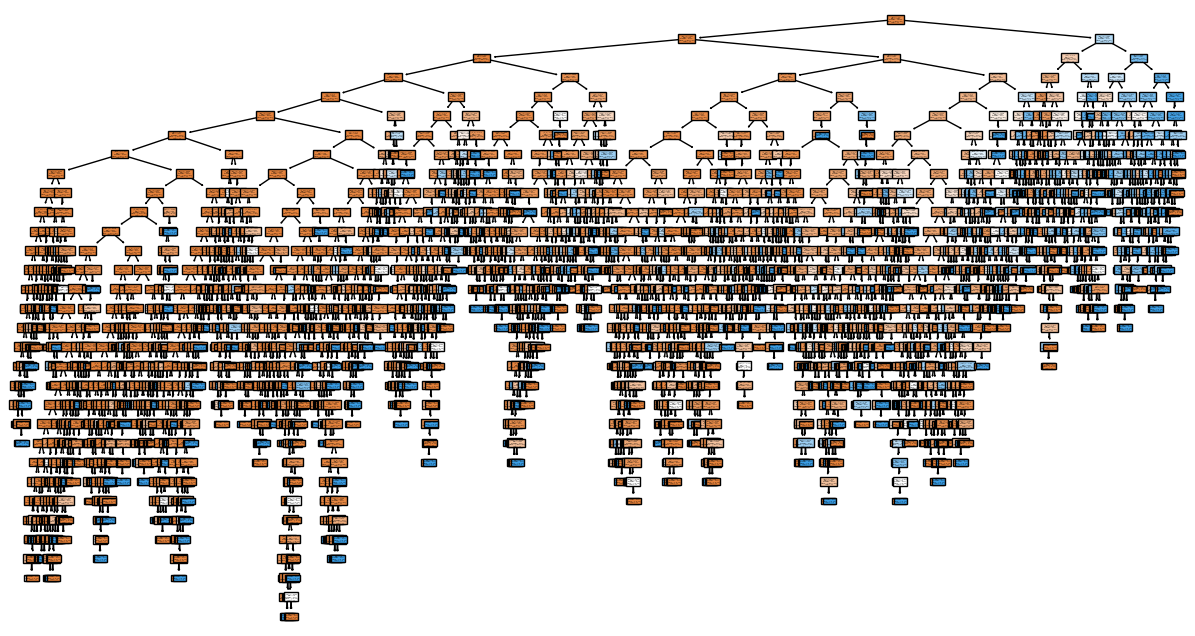

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_,proportion = True)
plt.show()

# Tối ưu hóa hiệu suất cây quyết định

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9589500690744029


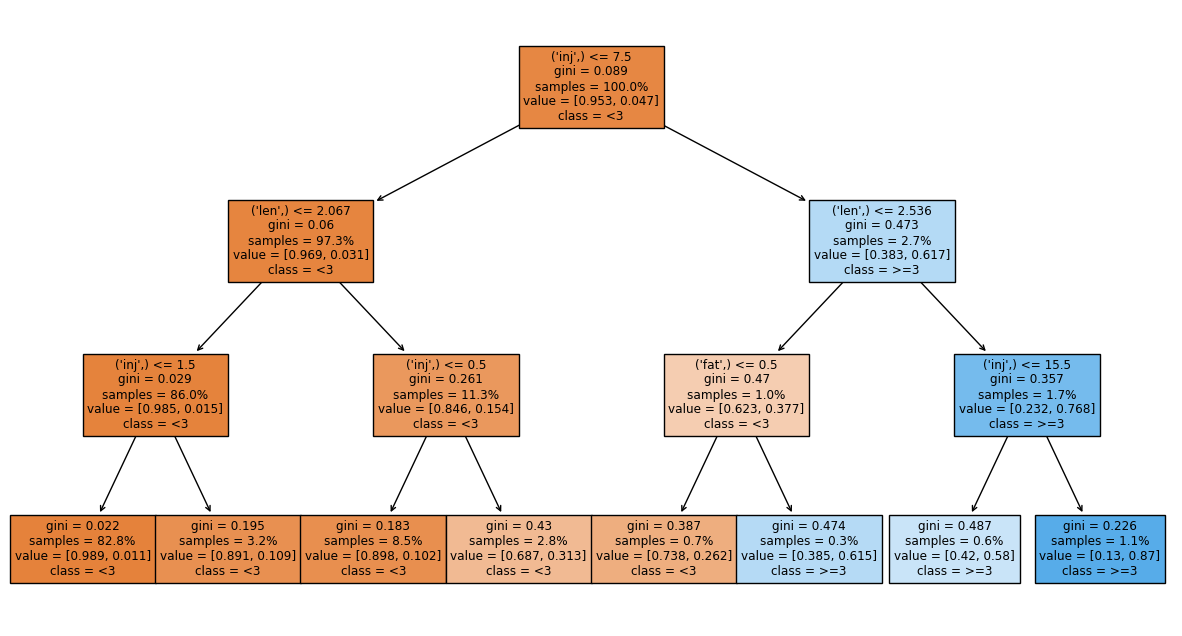

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_,proportion = True)
plt.show()

In [ ]:
print(export_text(clf,feature_names=list(X_train.columns)))

|--- ('inj',) <= 7.50
|   |--- ('len',) <= 2.07
|   |   |--- ('inj',) <= 1.50
|   |   |   |--- class: <3
|   |   |--- ('inj',) >  1.50
|   |   |   |--- class: <3
|   |--- ('len',) >  2.07
|   |   |--- ('inj',) <= 0.50
|   |   |   |--- class: <3
|   |   |--- ('inj',) >  0.50
|   |   |   |--- class: <3
|--- ('inj',) >  7.50
|   |--- ('len',) <= 2.54
|   |   |--- ('fat',) <= 0.50
|   |   |   |--- class: <3
|   |   |--- ('fat',) >  0.50
|   |   |   |--- class: >=3
|   |--- ('len',) >  2.54
|   |   |--- ('inj',) <= 15.50
|   |   |   |--- class: >=3
|   |   |--- ('inj',) >  15.50
|   |   |   |--- class: >=3



In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

inj      0.767751
len      0.211539
fat      0.020710
st_1     0.000000
st_44    0.000000
st_33    0.000000
st_34    0.000000
st_35    0.000000
st_36    0.000000
st_37    0.000000
st_38    0.000000
st_39    0.000000
st_40    0.000000
st_41    0.000000
st_42    0.000000
st_43    0.000000
st_46    0.000000
st_45    0.000000
st_2     0.000000
st_47    0.000000
st_48    0.000000
st_49    0.000000
st_50    0.000000
st_51    0.000000
st_52    0.000000
slat     0.000000
slon     0.000000
elat     0.000000
elon     0.000000
st_32    0.000000
st_31    0.000000
st_30    0.000000
st_15    0.000000
st_3     0.000000
st_4     0.000000
st_5     0.000000
st_6     0.000000
st_7     0.000000
st_8     0.000000
st_9     0.000000
st_10    0.000000
st_11    0.000000
st_12    0.000000
st_13    0.000000
st_14    0.000000
st_16    0.000000
st_29    0.000000
st_17    0.000000
st_18    0.000000
st_19    0.000000
st_20    0.000000
st_21    0.000000
st_22    0.000000
st_23    0.000000
st_24    0.000000
st_25    0

In [ ]:
index_strings = [str(idx) for idx in feature_scores.index]

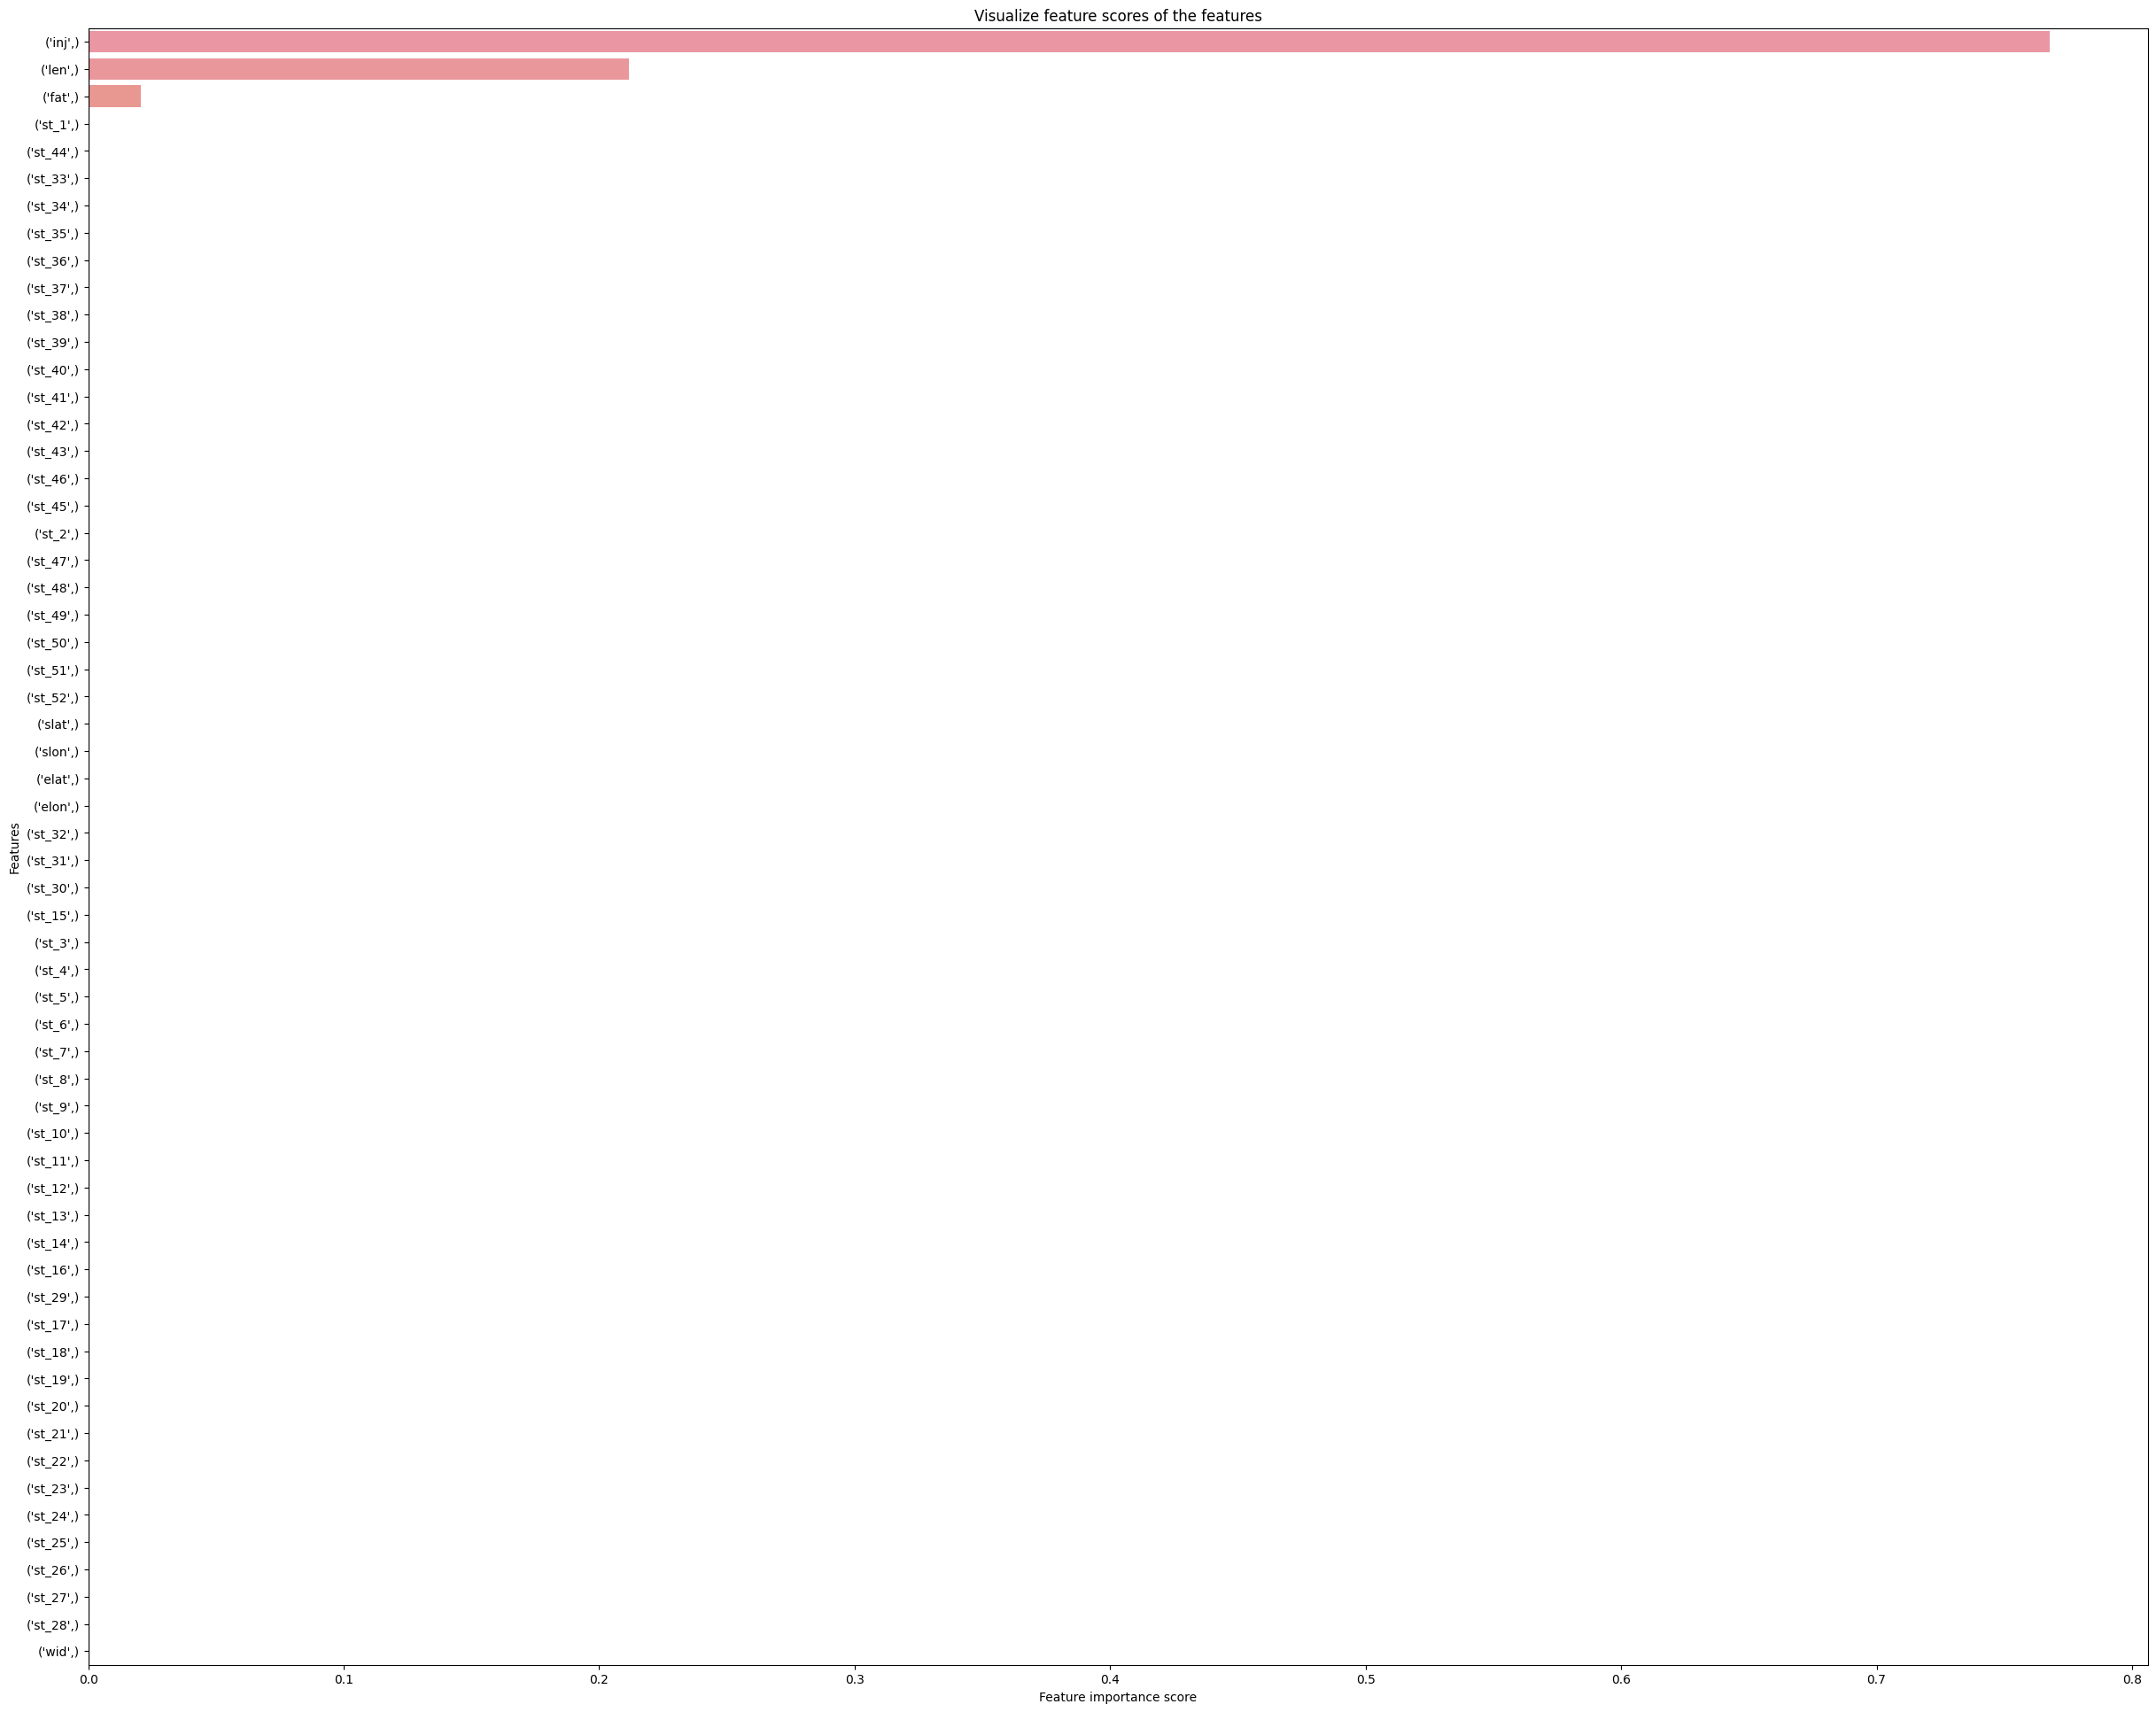

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=index_strings, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
# Xóa trường ít quan trọng nhất 'st_52' trong X_train và X_test
X_train = X_train.drop(['wid'], axis=1)

X_test = X_test.drop(['wid'], axis=1)

<ipython-input-31-5634b426d3bc>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train = X_train.drop(['wid'], axis=1)
<ipython-input-31-5634b426d3bc>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test = X_test.drop(['wid'], axis=1)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9589500690744029


# Ma trận nhầm lẫn

In [ ]:
# Tạo ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19174   123]
 [  709   262]]


<Axes: >

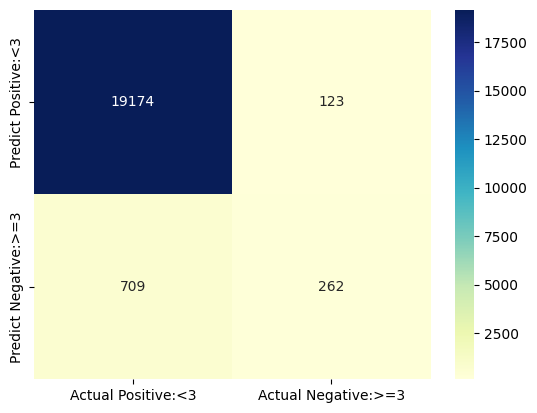

In [ ]:
# Trực quan hóa ma trận nhầm lẫn với seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:<3', 'Actual Negative:>=3'], 
                                 index=['Predict Positive:<3', 'Predict Negative:>=3'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Đánh giá hiệu suất của mô hình

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          <3       0.96      0.99      0.98     19297
         >=3       0.68      0.27      0.39       971

    accuracy                           0.96     20268
   macro avg       0.82      0.63      0.68     20268
weighted avg       0.95      0.96      0.95     20268

